# **df2 - Model-training**

# **Customer Feedback & Sentiment Dataset**

In [ ]:
########################################################################

In [ ]:
import pandas as pd

In [ ]:
df2=pd.read_csv('df2_bert_embeded.csv')

In [ ]:
df2.head()

Unnamed: 0                             Review_ID  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   
1           1  c241330b-01a9-471f-9e8a-774bcf36d58b   
2           2  8d5288f1-142c-4fe8-a0e7-a113ec1b8ca1   
3           3  451b4cf3-6123-4df7-b656-af7229d4beef   
4           4  ff5e9ff0-ff50-4de4-b825-67b85cabcc97   

                            Customer_ID Sentiment_Label  Rating  \
0  23b8c1e9-3924-46de-beb1-3b9046685257        Negative       2   
1  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd        Negative       1   
2  9e574f7a-a0ee-49ae-9453-dd324b0dbb41        Negative       1   
3  b02b61c4-a3d7-4628-ace6-6fa2fd5166e6        Positive       4   
4  1745d6d8-7e57-4ddf-8270-50a82369b584        Negative       1   

       Service_Type                                  Lemmatized_Review  \
0             Claim  quality beautiful instead ahead despite measur...   
1             Claim                 democratic shake grow gas analysis   
2  Customer Support  officer relate animal direction eye bag big pl...   
3   Policy Purchase  food shoulder argue start source husband tree ...   
4             Claim                       technology check civil quite   

                                  Word2Vec_Embedding  BERT_Embedding  
0  [-0.0061829146, 0.013488408, 0.0035640725, 0.0...       -7.066508  
1  [-0.0054913587, 0.0057755834, 0.0012450566, 0....       -6.115204  
2  [-0.0035938728, 0.00843976, 0.0021786473, 0.00...       -7.651156  
3  [-0.0059934086, 0.010755725, 0.005541168, 0.00...       -7.367544  
4  [-0.008219169, 0.008976587, 0.005485099, -0.00...       -5.620431

In [ ]:
df2.columns.values

array(['Unnamed: 0', 'Review_ID', 'Customer_ID', 'Sentiment_Label',
       'Rating', 'Service_Type', 'Lemmatized_Review',
       'Word2Vec_Embedding', 'BERT_Embedding'], dtype=object)

In [ ]:
df2['Service_Type'].value_counts()

Service_Type
Customer Support    358
Policy Purchase     337
Claim               305
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Reshape column to 2D array as required by OrdinalEncoder
service_type_reshaped = df2['Service_Type'].values.reshape(-1, 1)

# Apply ordinal encoding
encoder = OrdinalEncoder()
df2['Service_Type_Encoded'] = encoder.fit_transform(service_type_reshaped).astype(int)

# Check the unique values and their encoding
encoded_mapping = dict(zip(df2['Service_Type'], df2['Service_Type_Encoded']))
print(encoded_mapping)


{'Claim': 0, 'Customer Support': 1, 'Policy Purchase': 2}


In [ ]:
df2.head(1)

Unnamed: 0                             Review_ID  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   

                            Customer_ID Sentiment_Label  Rating Service_Type  \
0  23b8c1e9-3924-46de-beb1-3b9046685257        Negative       2        Claim   

                                   Lemmatized_Review  \
0  quality beautiful instead ahead despite measur...   

                                  Word2Vec_Embedding  BERT_Embedding  \
0  [-0.0061829146, 0.013488408, 0.0035640725, 0.0...       -7.066508   

   Service_Type_Encoded  
0                     0

In [ ]:
df2['Service_Type_Encoded'].value_counts()

Service_Type_Encoded
1    358
2    337
0    305
Name: count, dtype: int64

In [ ]:
feature = df2[['BERT_Embedding','Rating','Service_Type_Encoded']]
target = df2['Sentiment_Label']

In [ ]:
df2['Sentiment_Label'].value_counts()

Sentiment_Label
Positive    388
Neutral     359
Negative    253
Name: count, dtype: int64

# **Target is Multiclass**

In [ ]:
import numpy as np

# Convert the embeddings into a 2D numpy array
X = feature  # Stacks the list of embeddings into a proper 2D array
y = target

# Now your features are properly shaped for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.83      0.85        53
     Neutral       0.71      0.71      0.71        69
    Positive       0.84      0.86      0.85        78

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [ ]:
###########################################################################################

# **Check Dataset is Balanced or Unbalanced**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check value counts of the target column
value_counts = df2['Sentiment_Label'].value_counts()
print(value_counts)

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment_Label', data=df2)
plt.title('Sentiment Label Distribution')
plt.show()

# Check balance status
max_count = value_counts.max()
min_count = value_counts.min()
threshold = 0.1  # 10% imbalance threshold

imbalance_ratio = (max_count - min_count) / max_count

if imbalance_ratio > threshold:
    print("Dataset is IMBALANCED")
else:
    print("Dataset is BALANCED")


Sentiment_Label
Positive    388
Neutral     359
Negative    253
Name: count, dtype: int64


Dataset is IMBALANCED


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Features and target
X = df2[[col for col in df2.columns if col.startswith('BERT_')]]  # All BERT columns
y = df2['Sentiment_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_smote))

# Now your dataset is balanced — ready for model training


Before SMOTE: Counter({'Positive': 310, 'Neutral': 290, 'Negative': 200})
After SMOTE: Counter({'Positive': 310, 'Neutral': 310, 'Negative': 310})


# **After Smote Random Forest Classifier**

Train Accuracy: 1.00
Test Accuracy: 0.79

Classification Report (Test Set):
               precision    recall  f1-score   support

    Negative       0.82      0.87      0.84        53
     Neutral       0.70      0.67      0.68        69
    Positive       0.83      0.83      0.83        78

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.79       200
weighted avg       0.78      0.79      0.78       200



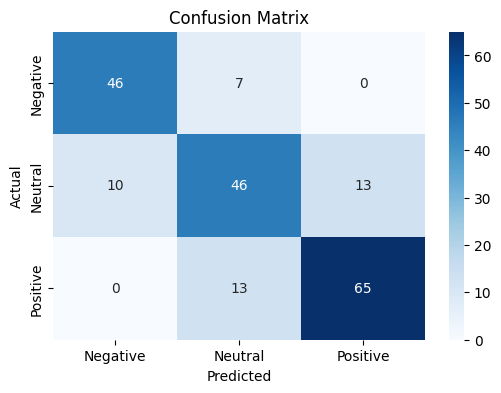


For class 'Negative':
True Positives (TP): 46
False Positives (FP): 10
False Negatives (FN): 7
True Negatives (TN): 137

For class 'Neutral':
True Positives (TP): 46
False Positives (FP): 20
False Negatives (FN): 23
True Negatives (TN): 111

For class 'Positive':
True Positives (TP): 65
False Positives (FP): 13
False Negatives (FN): 13
True Negatives (TN): 109

🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Convert the embeddings into a 2D numpy array
X = feature  # Stacks the list of embeddings into a proper 2D array
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_test = rf_classifier.predict(X_test)
y_pred_train = rf_classifier.predict(X_train_smote)

# Accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extracting TP, FP, TN, FN for each class
labels = np.unique(y)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"\nFor class '{label}':")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Determining if the model is overfitting, underfitting, or generalizing well
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\n🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n⚠️ Model is UNDERFITTING: Both training and test accuracy are low.")
else:
    print("\n✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.")


**Train Accuracy: 1.00**

**Test Accuracy: 0.79**

In [ ]:
#####################################################################################

# **Finding Best Params for Random Forest using Hyperparameter Tuning**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Convert the embeddings into a 2D numpy array
X = np.vstack(df2['BERT_Embedding'].values)  # Stacks the list of embeddings into a proper 2D array
y = df2['Sentiment_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [10, 20, None],            # Depth of each tree
    'min_samples_split': [2, 5, 10],        # Min samples needed to split
    'min_samples_leaf': [1, 3, 5],         # Min samples per leaf
    'max_features': ['sqrt', 'log2'],       # Number of features to consider
    'criterion': ['gini', 'entropy']        # Splitting criterion
}

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # Optimize for accuracy
    n_jobs=-1,                 # Use all available CPUs
    verbose=2                  # Show progress
)

# Fit GridSearch
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred_test = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train_smote)

# Accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extracting TP, FP, TN, FN for each class
labels = np.unique(y)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"\nFor class '{label}':")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Determining if the model is overfitting, underfitting, or generalizing well
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\n🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n⚠️ Model is UNDERFITTING: Both training and test accuracy are low.")
else:
    print("\n✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.37020287404902785
Train Accuracy: 0.81
Test Accuracy: 0.31

Classification Report (Test Set):
               precision    recall  f1-score   support

    Negative       0.31      0.28      0.30        71
     Neutral       0.29      0.27      0.28        73
    Positive       0.32      0.39      0.35        56

    accuracy                           0.31       200
   macro avg       0.31      0.32      0.31       200
weighted avg       0.31      0.31      0.31       200




For class 'Negative':
True Positives (TP): 20
False Positives (FP): 44
False Negatives (FN): 51
True Negatives (TN): 85

For class 'Neutral':
True Positives (TP): 20
False Positives (FP): 48
False Negatives (FN): 53
True Negatives (TN): 79

For class 'Positive':
True Positives (TP): 22
False Positives (FP): 46
False Negatives (FN): 34
True Negatives (TN): 98

🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.


# **Fitting 5 folds for each of 324 candidates, totalling 1620 fits**

# **Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Convert the embeddings into a 2D numpy array
X = feature  # Stacks the list of embeddings into a proper 2D array
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# RandomForest classifier
rf_classifier = RandomForestClassifier(criterion='entropy',max_depth=20,max_features='sqrt',min_samples_leaf=1, min_samples_split=5,n_estimators=100, random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_test = rf_classifier.predict(X_test)
y_pred_train = rf_classifier.predict(X_train_smote)

# Accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extracting TP, FP, TN, FN for each class
labels = np.unique(y)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"\nFor class '{label}':")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Determining if the model is overfitting, underfitting, or generalizing well
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\n🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n⚠️ Model is UNDERFITTING: Both training and test accuracy are low.")
else:
    print("\n✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.")


Train Accuracy: 0.97
Test Accuracy: 0.80

Classification Report (Test Set):
               precision    recall  f1-score   support

    Negative       0.83      0.83      0.83        53
     Neutral       0.72      0.67      0.69        69
    Positive       0.83      0.88      0.86        78

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.80      0.79       200




For class 'Negative':
True Positives (TP): 44
False Positives (FP): 9
False Negatives (FN): 9
True Negatives (TN): 138

For class 'Neutral':
True Positives (TP): 46
False Positives (FP): 18
False Negatives (FN): 23
True Negatives (TN): 113

For class 'Positive':
True Positives (TP): 69
False Positives (FP): 14
False Negatives (FN): 9
True Negatives (TN): 108

🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.


**Train Accuracy: 0.97**

**Test Accuracy: 0.80**

# **Still Model is Overfit but little bit reduce train accuracy after of Hyperparameter Tuning**

In [ ]:
#################################################################################################

In [ ]:
df2['Sentiment_Label'].value_counts()

Sentiment_Label
Positive    388
Neutral     359
Negative    253
Name: count, dtype: int64

In [ ]:
sentiment_mapping = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

df2['Sentiment_Label'] = df2['Sentiment_Label'].map(sentiment_mapping)
print(df2['Sentiment_Label'].head())  # To check if mapping worked


0    0
1    0
2    0
3    2
4    0
Name: Sentiment_Label, dtype: int64


In [ ]:
df2.head()

Unnamed: 0                             Review_ID  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   
1           1  c241330b-01a9-471f-9e8a-774bcf36d58b   
2           2  8d5288f1-142c-4fe8-a0e7-a113ec1b8ca1   
3           3  451b4cf3-6123-4df7-b656-af7229d4beef   
4           4  ff5e9ff0-ff50-4de4-b825-67b85cabcc97   

                            Customer_ID  Sentiment_Label  Rating  \
0  23b8c1e9-3924-46de-beb1-3b9046685257                0       2   
1  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd                0       1   
2  9e574f7a-a0ee-49ae-9453-dd324b0dbb41                0       1   
3  b02b61c4-a3d7-4628-ace6-6fa2fd5166e6                2       4   
4  1745d6d8-7e57-4ddf-8270-50a82369b584                0       1   

       Service_Type                                  Lemmatized_Review  \
0             Claim  quality beautiful instead ahead despite measur...   
1             Claim                 democratic shake grow gas analysis   
2  Customer Support  officer relate animal direction eye bag big pl...   
3   Policy Purchase  food shoulder argue start source husband tree ...   
4             Claim                       technology check civil quite   

                                  Word2Vec_Embedding  BERT_Embedding  \
0  [-0.0061829146, 0.013488408, 0.0035640725, 0.0...       -7.066508   
1  [-0.0054913587, 0.0057755834, 0.0012450566, 0....       -6.115204   
2  [-0.0035938728, 0.00843976, 0.0021786473, 0.00...       -7.651156   
3  [-0.0059934086, 0.010755725, 0.005541168, 0.00...       -7.367544   
4  [-0.008219169, 0.008976587, 0.005485099, -0.00...       -5.620431   

   Service_Type_Encoded  
0                     0  
1                     0  
2                     1  
3                     2  
4                     0

In [ ]:
df2.to_csv('df2-embed-encoded.csv')

# **2) XGBoosting Algorithm**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Convert the embeddings into a 2D numpy array
X = feature  # Stacks the list of embeddings into a proper 2D array
y = df2['Sentiment_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train_smote)

# Accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extracting TP, FP, TN, FN for each class
labels = np.unique(y)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"\nFor class '{label}':")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Determining if the model is overfitting, underfitting, or generalizing well
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\n🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n⚠️ Model is UNDERFITTING: Both training and test accuracy are low.")
else:
    print("\n✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.")


Train Accuracy: 0.95
Test Accuracy: 0.80

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        53
           1       0.76      0.59      0.67        69
           2       0.82      0.92      0.87        78

    accuracy                           0.80       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.79      0.80      0.79       200




For class '0':
True Positives (TP): 46
False Positives (FP): 12
False Negatives (FN): 7
True Negatives (TN): 135

For class '1':
True Positives (TP): 41
False Positives (FP): 13
False Negatives (FN): 28
True Negatives (TN): 118

For class '2':
True Positives (TP): 72
False Positives (FP): 16
False Negatives (FN): 6
True Negatives (TN): 106

🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.


# **Little bit vary compare to Random Forest Algorithm**

**Train Accuracy: 0.95**

**Test Accuracy: 0.80**

In [ ]:
##############################################################################################

# 2) Now use **Navie_bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X, y)

# Predictions
y_pred_test = nb_classifier.predict(X_test)
y_pred_train = nb_classifier.predict(X_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Train Accuracy: 0.85
Test Accuracy: 0.84

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.82      0.96      0.89        53
           1       0.93      0.58      0.71        69
           2       0.81      0.99      0.89        78

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.83       200
weighted avg       0.86      0.84      0.83       200



# **While using Navie Bayes:**

**Train Accuracy: 0.86**

**Test Accuracy: 0.84**

# **Model is Genralized Well Overfit is Reduced Compare to XGboost and Random Forest**

In [ ]:
df2.head(1)

Unnamed: 0                             Review_ID  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   

                            Customer_ID  Sentiment_Label  Rating Service_Type  \
0  23b8c1e9-3924-46de-beb1-3b9046685257                0       2        Claim   

                                   Lemmatized_Review  \
0  quality beautiful instead ahead despite measur...   

                                  Word2Vec_Embedding  BERT_Embedding  \
0  [-0.0061829146, 0.013488408, 0.0035640725, 0.0...       -7.066508   

   Service_Type_Encoded  
0                     0

In [ ]:
###########################################################################################

In [ ]:
df2['Sentiment_Label'].value_counts()

Sentiment_Label
1    354
0    331
2    315
Name: count, dtype: int64

In [ ]:
import joblib

# Save the model
joblib.dump(nb_classifier, 'naive_bayes_model.pkl')

print("Model saved successfully!")


Model saved successfully!
